In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import string
# import fasttext
# import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
df_full = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats_lemma.csv")

In [ ]:
df_for_y = pd.read_csv("drive/MyDrive/Final Project/story_data_new_feats.csv")

In [ ]:
df = df_full.copy()

In [ ]:
df.head()

,text_str_lem,lemmatized_parag
0,\n 11:59 \n\t -PRON- shoot straight out of b...,"['', ' 11:59 \xa0\xa0', '\t -PRON- shoot strai..."
1,\n Mia ’s room be pretty much bare . -PRON- li...,"['', ' Mia ’s room be pretty much bare . -PRON..."
2,"\n \n Lin have to figure out thing , because o...","['', ' ', ' Lin have to figure out thing , bec..."
3,"\n the Shiva , 1955 \n \n\t for the rest of -...","['', ' the Shiva , 1955 ', ' ', '\t for the r..."
4,\n the wind whip through -PRON- hair as -PRON-...,"['', ' the wind whip through -PRON- hair as -P..."


In [ ]:
target = df_for_y['num_likes']
target = target+1
y = np.log(target)

In [ ]:
X = df['text_str_lem']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42
                                                    )

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
def the_outcome(X_train, y_train, X_test, y_test, model, model_label):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r_2 = r2_score(y_test, y_pred)
    print(f'Model {model_label} RMSE: {rmse}')
    print(f'Model {model_label} R2: {r_2}')
    plt.figure(figsize=(15,15))
    plt.scatter(y_test, y_pred)
    plt.xlabel('True', fontsize=16)
    plt.ylabel('Prediction', fontsize=16)
    plt.title(f'\nLikes {model_label}\n', fontsize=20)
    plt.show()
    return y_pred

Model Linear RMSE: 0.8668150347619616
Model Linear R2: -1.2690479887563546


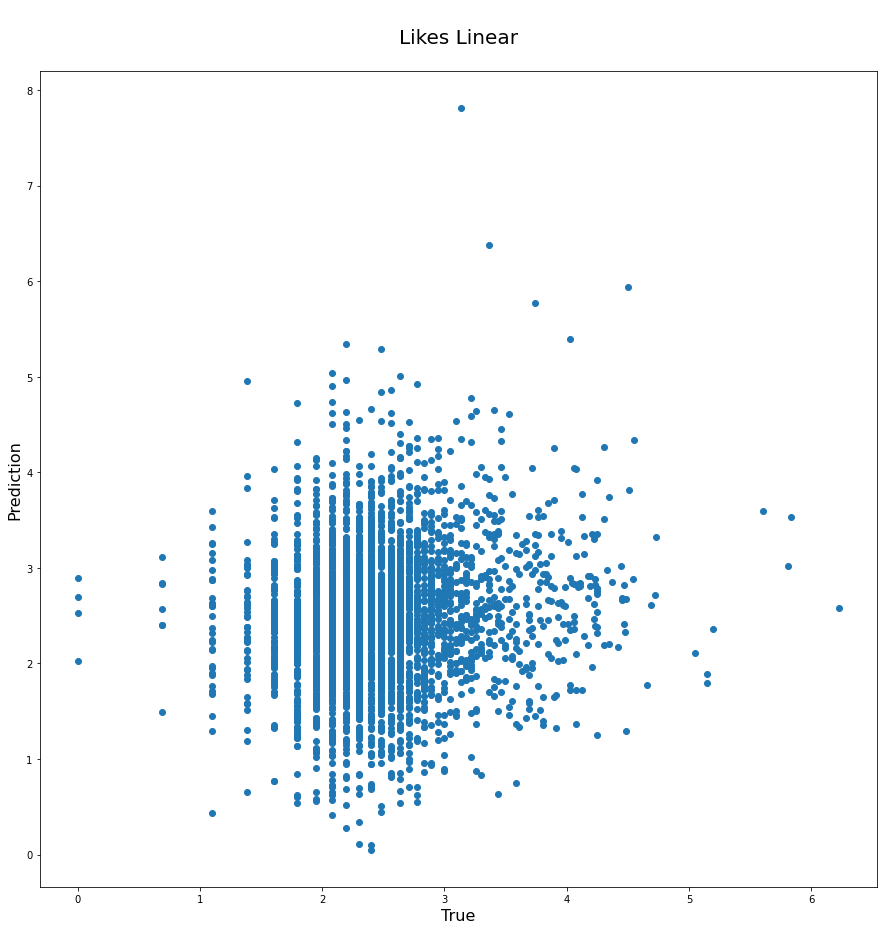

In [ ]:
lin_reg = LinearRegression()

lin_pred = the_outcome(X_train, y_train, X_test, y_test, lin_reg, 'Linear')

Model SVR RMSE: 0.5651954220926184
Model SVR R2: 0.03530932365075601


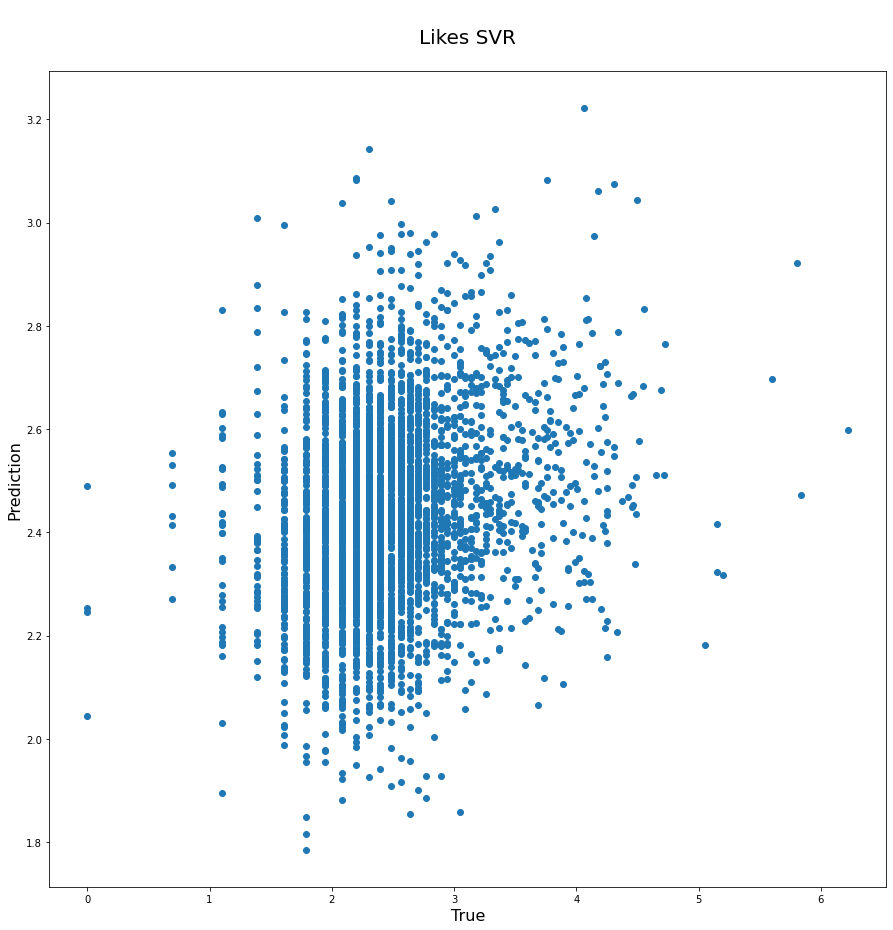

In [ ]:
svr_reg = SVR()

svr_reg_pred = the_outcome(X_train, y_train, X_test, y_test, svr_reg, 'SVR')

Model KNN RMSE: 0.6187752102060741
Model KNN R2: -0.15626298454924803


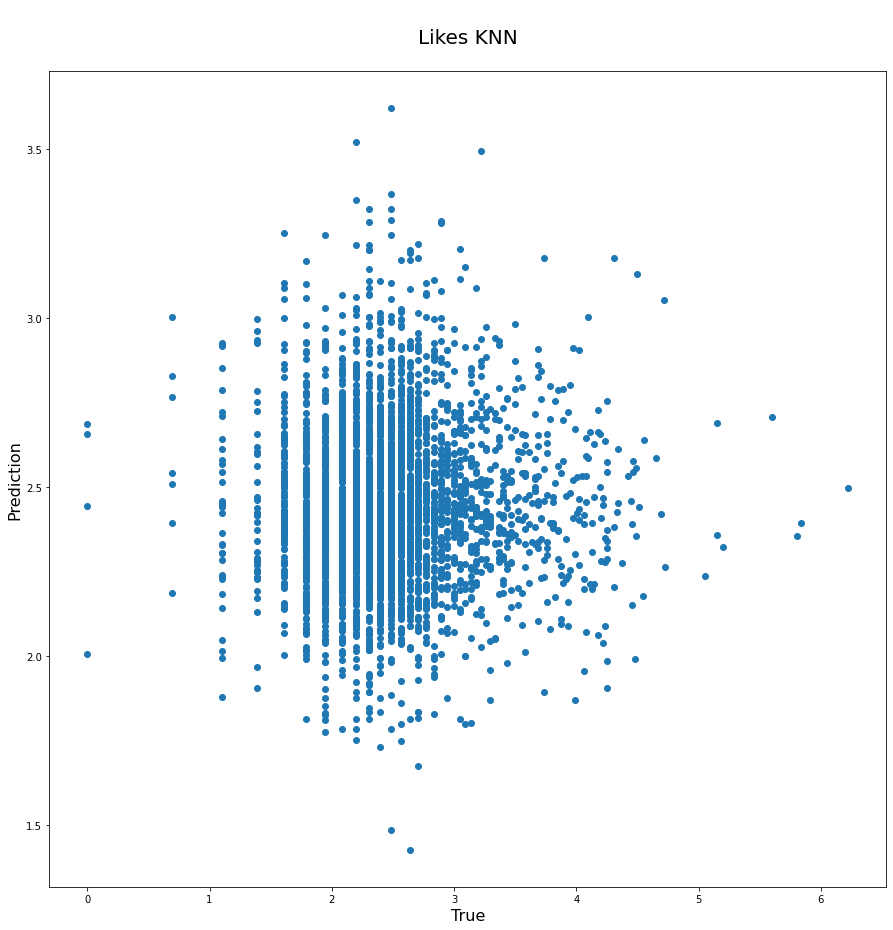

In [ ]:
knn_reg = KNeighborsRegressor(n_neighbors=5)

knn_pred = the_outcome(X_train, y_train, X_test, y_test, knn_reg, 'KNN')